# PRACTICA GUIADA: Regresión Lineal con scikit-learn y statsmodels

Vamos a investigar el dataset inmobiliario usando regresión lineal. Vamos a usar dos librerías (o paquetes) diferentes, para los que pueden ver ejemplos en la documentación oficial.
* statsmodels -- [docs regresión lineal](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [docs regresión lineal](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## 1. Introducción

Ya nos hemos familizarizado bastante con scikit-learn. La librería también incluye algunos datasets.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
data = datasets.load_boston()

print (data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 2. Conociendo el formato de los datsets de scikit-learn

In [2]:
type(data)

sklearn.datasets.base.Bunch

In [3]:
print (data.feature_names)
print (data.data[0])
print (data.target[0])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


Como pueden ver, Scikit-learn ya separó el precio de las casas del resto de las variables.

## 3. Estimando el modelo de regresión lineal

Primero, pongamos los datos en un data frame y asegurémonos de que esté todo cargado correctamente

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display
df = pd.DataFrame(data.data, columns=data.feature_names)

# Ponemos el target (precio de las casas -- MEDV) en otro DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Miremos las primeras filas de datos
display (df.head())
display (targets.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


* Identifiquemos visualmente algunas variables que parezcan relacionadas al precio, RM and LSTAT. 

* Hagamos un análisis por separado y luego juntas.

In [6]:
# Generamos las matrices y el target

X = df[["RM"]]
y = targets["MEDV"]

# Importamos, Instanciamos, Fiteamos, etc..

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   -34.6706207764
RM=   [ 9.10210898]
R2_train=   0.483525455991


In [7]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

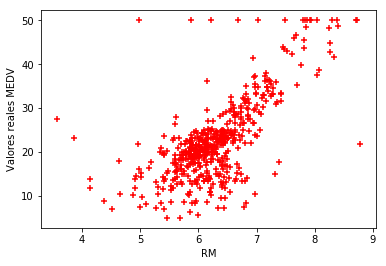

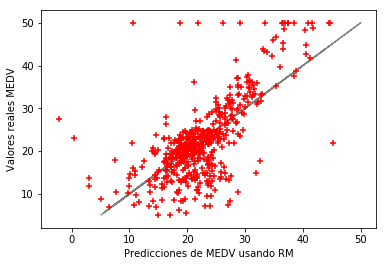

In [8]:
# Graficamos la variable X contra la variable Y
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

In [9]:
print ("EMC:", mean_squared_error(y, predictions)) # error medio cuadrático
sum_mod(model, X)

EMC: 43.6005517712


,0
RM,9.102109
Intecept,-34.670621
R2,0.483525


* ¿Qué pueden decir al comparar los dos gráficos? ¿Cómo interpretan el último gráfico ? ¿Qué les dice acerca del modelo? ¿Qué pueden decir acerca de la relación entre RM y MEDV? 

* Repitamos ahora lo anterior pero usando otra variable...

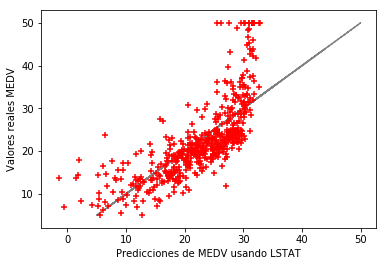

EMC: 38.4829672299


,0
LSTAT,-0.950049
Intecept,34.553841
R2,0.544146


In [10]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
sum_mod(model, X)

* ¿Qué pueden decir al comparar éste modelo y el anterior? 
* Estimemos, ahora, un modelo usando las dos variables anteriores.

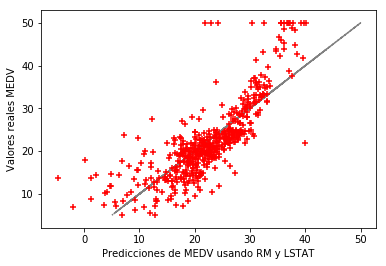

EMC: 30.5124687773


In [11]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de MEDV usando RM y LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)

## Comparando los modelos

Un modelo perfecto se vería como una línea recta a 45 grados como la que vemos en gris. Ya veremos cómo cuantificar la bondad de ajuste pronto.

### Ejercicio

Ajustar el modelo usando TODAS las variables, usando `X = df`. Esto mejora el ajuste? (comparar el EMC).

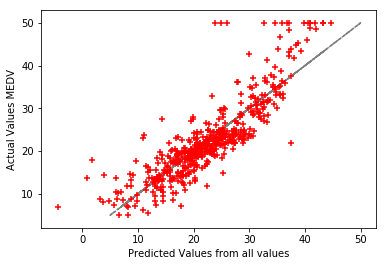

MSE: 21.8977792177
Improve:  True
                  0
CRIM      -0.107171
ZN         0.046395
INDUS      0.020860
CHAS       2.688561
NOX      -17.795759
RM         3.804752
AGE        0.000751
DIS       -1.475759
RAD        0.305655
TAX       -0.012329
PTRATIO   -0.953464
B          0.009393
LSTAT     -0.525467
Intecept  36.491103
R2         0.740608


In [12]:
lm = linear_model.LinearRegression()

#X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

#Otra opción para definir X
X = df[list(df.columns.values)]

y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Actual Values MEDV")
plt.show()
print ("MSE:", mean_squared_error(y, predictions))
print ("Improve: ", mean_squared_error(y, predictions) < prevMSE)

print (sum_mod(model, X))

## Introducción a Statsmodels

Veamos ahora cómo se usa otra librería popular para realizar regresiones.

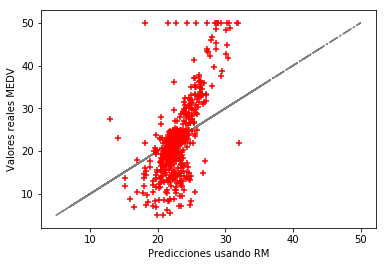

EMC: 58.4106354321
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Fri, 15 Sep 2017   Prob (F-statistic):          3.74e-256
Time:                        00:15:43   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054 

In [15]:
import statsmodels.api as sm

X = df[["RM"]]
y = targets[["MEDV"]]

# Notar la diferencia en el orden de X e y en este caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

Comparen los resultados obtenidos con esta librería y el análogo con scikit-learn. Llegan al mismo modelo?

Ahora agreguen la siguiente línea luego de la definición de X en `statsmodels`:
```
X = sm.add_constant(X)
```
y prueben nuevamente.

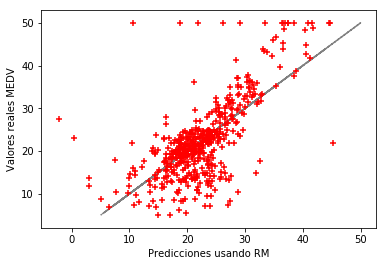

EMC: 43.6005517712
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           2.49e-74
Time:                        00:08:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650 

In [14]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

## PRACTICA INDEPENDIENTE

### Ejercicios

Recrear los resultados de scikit learn con `statsmodels`:
* usando LSTAT
* usando RM and LSTAT
* usando todas las variables

Comparen los gráficos y los EMC.

#### Usando LSTAT

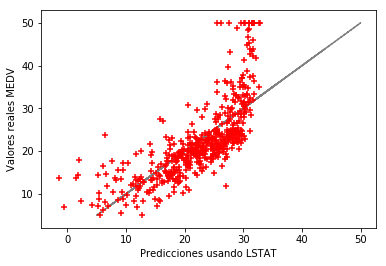

EMC: 38.4829672299
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           5.08e-88
Time:                        00:18:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563 

In [16]:
import statsmodels.api as sm

X = df[["LSTAT"]]
X = sm.add_constant(X)
y = targets[["MEDV"]]

# Notar la diferencia en el orden de X e y en este caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

#### Usando LSTAT y RM

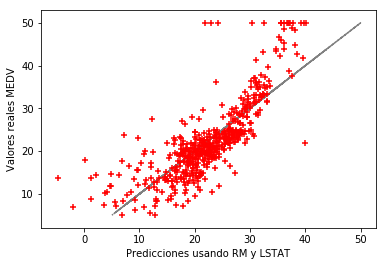

EMC: 30.5124687773
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 15 Sep 2017   Prob (F-statistic):          7.01e-112
Time:                        00:20:16   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173 

In [17]:
import statsmodels.api as sm

X = df[["RM", "LSTAT"]]
X = sm.add_constant(X)
y = targets[["MEDV"]]

# Notar la diferencia en el orden de X e y en este caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM y LSTAT")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

#### Con todas las variables como predictoras

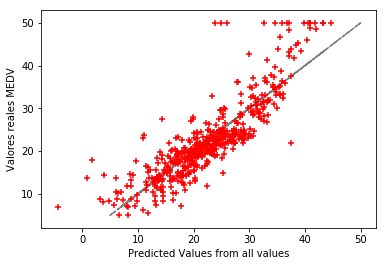

EMC: 21.8977792177
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 15 Sep 2017   Prob (F-statistic):          6.95e-135
Time:                        00:31:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104 

In [26]:
import statsmodels.api as sm

X = df[list(df.columns.values)]
X = sm.add_constant(X)
y = targets[["MEDV"]]

# Notar la diferencia en el orden de X e y en este caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

### Crossvalidation

In [32]:
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()

X = df[['RM']]
y = targets["MEDV"]

model = lm.fit(X, y)
scores = cross_val_score(model, 
                         X, y, 
                         cv=5, scoring='neg_mean_squared_error')
print(scores)
np.sqrt(np.mean(-scores))

[ -10.11581024  -33.25013827  -39.73491255 -106.6526283   -73.84557039]


7.2608409946785288

In [31]:
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()

X = df[['RM', 'LSTAT']]
y = targets["MEDV"]

model = lm.fit(X, y)
scores = cross_val_score(model, 
                         X, y, 
                         cv=5, scoring='neg_mean_squared_error')
print(scores)
np.sqrt(np.mean(-scores))

[-11.78879381 -28.97215949 -47.84395882 -71.77053822 -36.6099291 ]


6.276709001385516

In [30]:
from sklearn.model_selection import cross_val_score
lm = linear_model.LinearRegression()

X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = targets["MEDV"]

model = lm.fit(X, y)
scores = cross_val_score(model, 
                         X, y, 
                         cv=5, scoring='neg_mean_squared_error')
print(scores)
np.sqrt(np.mean(-scores))

[-12.48065021 -26.09620267 -33.11995587 -80.83305378 -33.58435565]


6.101052666314124

### Tensorflow

https://aqibsaeed.github.io/2016-07-07-TensorflowLR/

In [43]:
import tensorflow as tf
features = np.array(data.data)
labels = np.array(data.target)

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

f, l = append_bias_reshape(features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [48]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.global_variables_initializer()

y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# with tf.Session() as sess:
#     for epoch in range(training_epochs):
#         sess.run(training_step,feed_dict={X:train_x,Y:train_y})
#         cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
#         
#     pred_y = sess.run(y_, feed_dict={X: test_x})
#     mse = tf.reduce_mean(tf.square(pred_y - test_y))